## AAI Project - Dish Generation

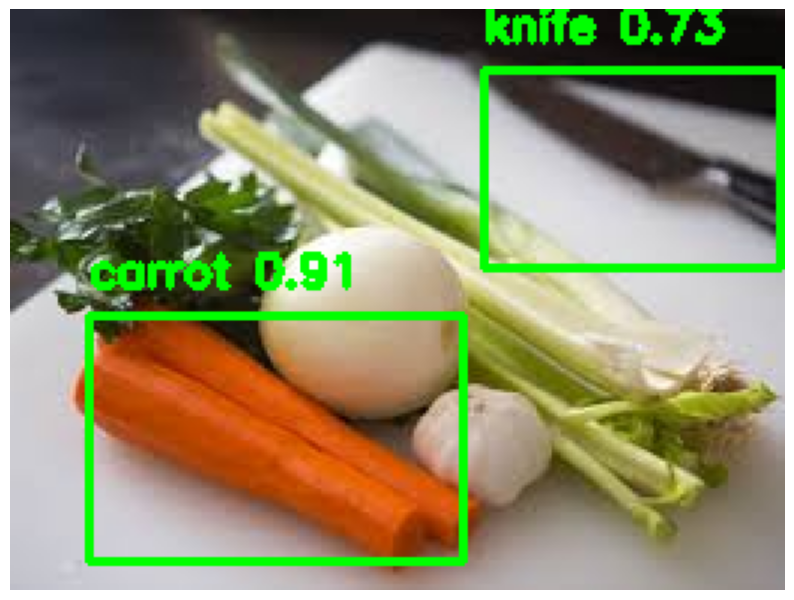

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

image = cv2.imread("C:\\Users\\ADMIN\\Downloads\\images (7).jpeg")
height, width, channels = image.shape

blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, label + " " + confidence, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

cv2.imwrite("detected_ingredients.jpg", image)



In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

def generate_recipe_nlp(ingredients):
    """Generate a recipe based on detected ingredients using GPT-2."""
    prompt = f"Generate a simple recipe using the following ingredients: {', '.join(ingredients)}."

    inputs = tokenizer.encode(prompt, return_tensors="pt")

    with torch.no_grad():
        outputs = model.generate(inputs, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, top_p=0.92, top_k=50, temperature=0.7)

    recipe = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    return recipe[len(prompt):].strip()

detected_ingredients = ['tomato', 'onion', 'garlic']

recipe = generate_recipe_nlp(detected_ingredients)

print("Generated Recipe: ", recipe)


c:\Users\ADMIN\anaconda3\envs\Teju\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ADMIN\anaconda3\envs\Teju\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\Teju\Lib\site-packages\transformers\generation\configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\Teju\Lib\site-packages\transformers\generation\configuration_utils.py:497: UserWarning: `do_sa

Generated Recipe:  Step 1: Prepare the tomato paste. In a large bowl, combine the tomatoes, onions, and garlic and mix well. Add the flour and stir to combine. Pour the mixture into a small bowl and cover with plastic wrap. Cover and refrigerate for at least 24 hours.


Epoch [1/5] Batch 0/6313 Loss D: 1.3336 G: 1.7430
Epoch [1/5] Batch 100/6313 Loss D: 0.0410 G: 5.7622
Epoch [1/5] Batch 200/6313 Loss D: 0.2613 G: 4.6794
Epoch [1/5] Batch 300/6313 Loss D: 0.7201 G: 2.3367
Epoch [1/5] Batch 400/6313 Loss D: 0.8673 G: 4.8381
Epoch [1/5] Batch 500/6313 Loss D: 1.1119 G: 2.2493
Epoch [1/5] Batch 600/6313 Loss D: 0.8026 G: 2.5868
Epoch [1/5] Batch 700/6313 Loss D: 0.3602 G: 3.8360
Epoch [1/5] Batch 800/6313 Loss D: 0.2702 G: 4.1486
Epoch [1/5] Batch 900/6313 Loss D: 0.6171 G: 3.4324
Epoch [1/5] Batch 1000/6313 Loss D: 0.7869 G: 2.8961
Epoch [1/5] Batch 1100/6313 Loss D: 0.7293 G: 2.4402
Epoch [1/5] Batch 1200/6313 Loss D: 0.5889 G: 2.7602
Epoch [1/5] Batch 1300/6313 Loss D: 0.4692 G: 3.2948
Epoch [1/5] Batch 1400/6313 Loss D: 0.7457 G: 2.3564
Epoch [1/5] Batch 1500/6313 Loss D: 0.6227 G: 4.2798
Epoch [1/5] Batch 1600/6313 Loss D: 0.8168 G: 3.5394
Epoch [1/5] Batch 1700/6313 Loss D: 0.7341 G: 3.2197
Epoch [1/5] Batch 1800/6313 Loss D: 0.3809 G: 2.8190
Epoch

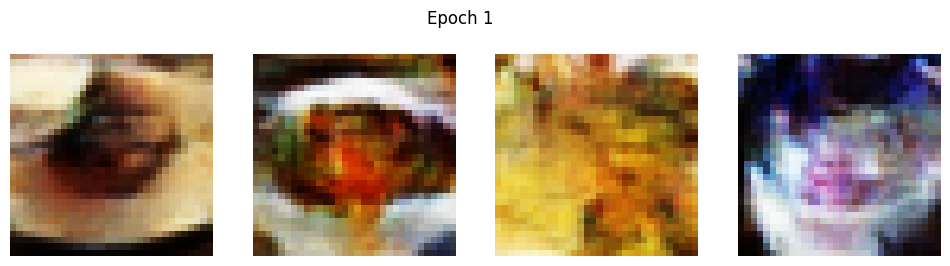

Epoch [2/5] Batch 0/6313 Loss D: 0.2762 G: 2.4181
Epoch [2/5] Batch 100/6313 Loss D: 0.5659 G: 3.4793
Epoch [2/5] Batch 200/6313 Loss D: 0.8397 G: 1.4459
Epoch [2/5] Batch 300/6313 Loss D: 0.4281 G: 2.5920
Epoch [2/5] Batch 400/6313 Loss D: 0.3169 G: 2.7159
Epoch [2/5] Batch 500/6313 Loss D: 0.4062 G: 2.3888
Epoch [2/5] Batch 600/6313 Loss D: 0.5444 G: 4.2872
Epoch [2/5] Batch 700/6313 Loss D: 0.2374 G: 2.8615
Epoch [2/5] Batch 800/6313 Loss D: 0.5160 G: 4.0217
Epoch [2/5] Batch 900/6313 Loss D: 0.8394 G: 3.6496
Epoch [2/5] Batch 1000/6313 Loss D: 0.5046 G: 3.3821
Epoch [2/5] Batch 1100/6313 Loss D: 0.1746 G: 4.1744
Epoch [2/5] Batch 1200/6313 Loss D: 0.2830 G: 2.7374
Epoch [2/5] Batch 1300/6313 Loss D: 0.6394 G: 2.8341
Epoch [2/5] Batch 1400/6313 Loss D: 0.5405 G: 3.1260
Epoch [2/5] Batch 1500/6313 Loss D: 0.9718 G: 4.9470
Epoch [2/5] Batch 1600/6313 Loss D: 0.7386 G: 3.0582
Epoch [2/5] Batch 1700/6313 Loss D: 0.7255 G: 3.7402
Epoch [2/5] Batch 1800/6313 Loss D: 1.0625 G: 2.4983
Epoch

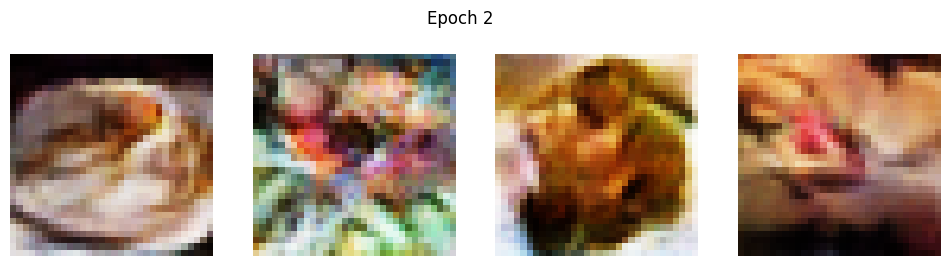

Epoch [3/5] Batch 0/6313 Loss D: 0.2886 G: 2.7361
Epoch [3/5] Batch 100/6313 Loss D: 0.4703 G: 2.8258
Epoch [3/5] Batch 200/6313 Loss D: 0.4280 G: 4.1897
Epoch [3/5] Batch 300/6313 Loss D: 0.5044 G: 3.2494
Epoch [3/5] Batch 400/6313 Loss D: 0.7325 G: 2.8397
Epoch [3/5] Batch 500/6313 Loss D: 0.2832 G: 3.3676
Epoch [3/5] Batch 600/6313 Loss D: 0.2945 G: 3.1705
Epoch [3/5] Batch 700/6313 Loss D: 0.4495 G: 4.5127
Epoch [3/5] Batch 800/6313 Loss D: 0.5693 G: 1.6404
Epoch [3/5] Batch 900/6313 Loss D: 0.4985 G: 3.8432
Epoch [3/5] Batch 1000/6313 Loss D: 1.7015 G: 0.6676
Epoch [3/5] Batch 1100/6313 Loss D: 0.2825 G: 3.5488
Epoch [3/5] Batch 1200/6313 Loss D: 0.8970 G: 4.1457
Epoch [3/5] Batch 1300/6313 Loss D: 0.7770 G: 2.8719
Epoch [3/5] Batch 1400/6313 Loss D: 0.4933 G: 2.5851
Epoch [3/5] Batch 1500/6313 Loss D: 0.2531 G: 3.2595
Epoch [3/5] Batch 1600/6313 Loss D: 1.1683 G: 1.2125
Epoch [3/5] Batch 1700/6313 Loss D: 0.4664 G: 4.1068
Epoch [3/5] Batch 1800/6313 Loss D: 0.5831 G: 3.9925
Epoch

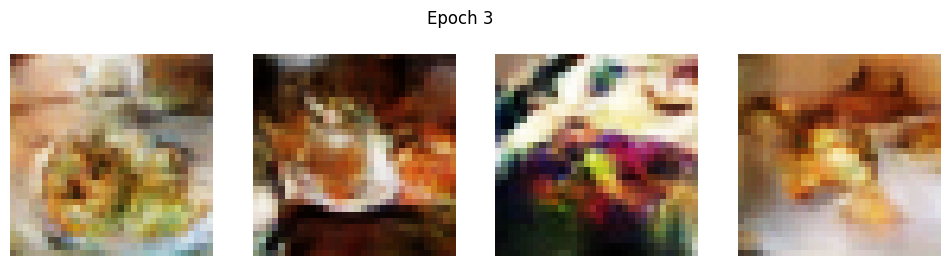

Epoch [4/5] Batch 0/6313 Loss D: 0.2782 G: 3.3541
Epoch [4/5] Batch 100/6313 Loss D: 0.2235 G: 3.6304
Epoch [4/5] Batch 200/6313 Loss D: 0.8497 G: 2.1508
Epoch [4/5] Batch 300/6313 Loss D: 0.7939 G: 1.5979
Epoch [4/5] Batch 400/6313 Loss D: 0.2871 G: 3.6081
Epoch [4/5] Batch 500/6313 Loss D: 0.2546 G: 3.5518
Epoch [4/5] Batch 600/6313 Loss D: 0.4178 G: 3.7080
Epoch [4/5] Batch 700/6313 Loss D: 0.5088 G: 2.4628
Epoch [4/5] Batch 800/6313 Loss D: 0.6599 G: 3.2142
Epoch [4/5] Batch 900/6313 Loss D: 0.3865 G: 3.0028
Epoch [4/5] Batch 1000/6313 Loss D: 0.4907 G: 4.7518
Epoch [4/5] Batch 1100/6313 Loss D: 0.1712 G: 3.9351
Epoch [4/5] Batch 1200/6313 Loss D: 0.3251 G: 4.2323
Epoch [4/5] Batch 1300/6313 Loss D: 0.3077 G: 1.6964
Epoch [4/5] Batch 1400/6313 Loss D: 0.3245 G: 2.8216
Epoch [4/5] Batch 1500/6313 Loss D: 0.3066 G: 3.8958
Epoch [4/5] Batch 1600/6313 Loss D: 1.0075 G: 4.2488
Epoch [4/5] Batch 1700/6313 Loss D: 0.6649 G: 1.7383
Epoch [4/5] Batch 1800/6313 Loss D: 0.6059 G: 3.3922
Epoch

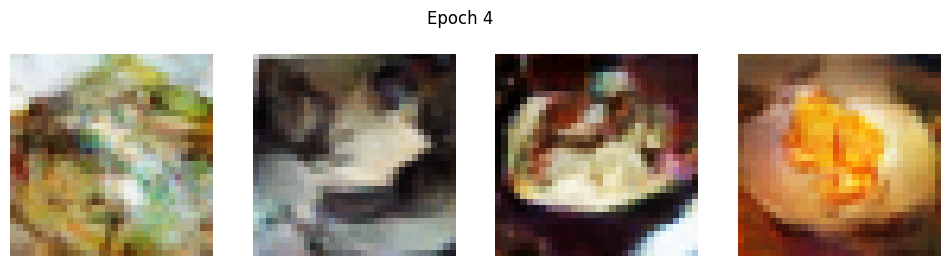

Epoch [5/5] Batch 0/6313 Loss D: 0.3318 G: 3.3671
Epoch [5/5] Batch 100/6313 Loss D: 0.1603 G: 4.0658
Epoch [5/5] Batch 200/6313 Loss D: 0.2146 G: 3.9217
Epoch [5/5] Batch 300/6313 Loss D: 0.3863 G: 4.1708
Epoch [5/5] Batch 400/6313 Loss D: 0.2181 G: 3.2451
Epoch [5/5] Batch 500/6313 Loss D: 0.2744 G: 4.3474
Epoch [5/5] Batch 600/6313 Loss D: 0.7677 G: 3.1644
Epoch [5/5] Batch 700/6313 Loss D: 0.4162 G: 3.3282
Epoch [5/5] Batch 800/6313 Loss D: 0.1150 G: 4.5664
Epoch [5/5] Batch 900/6313 Loss D: 0.4534 G: 1.8255
Epoch [5/5] Batch 1000/6313 Loss D: 0.3043 G: 4.5983
Epoch [5/5] Batch 1100/6313 Loss D: 0.2666 G: 4.5104
Epoch [5/5] Batch 1200/6313 Loss D: 0.6000 G: 3.9390
Epoch [5/5] Batch 1300/6313 Loss D: 0.3213 G: 2.7047
Epoch [5/5] Batch 1400/6313 Loss D: 0.2115 G: 4.4883
Epoch [5/5] Batch 1500/6313 Loss D: 0.1771 G: 4.6728
Epoch [5/5] Batch 1600/6313 Loss D: 0.2591 G: 3.8586
Epoch [5/5] Batch 1700/6313 Loss D: 0.1601 G: 3.3372
Epoch [5/5] Batch 1800/6313 Loss D: 0.5736 G: 1.6755
Epoch

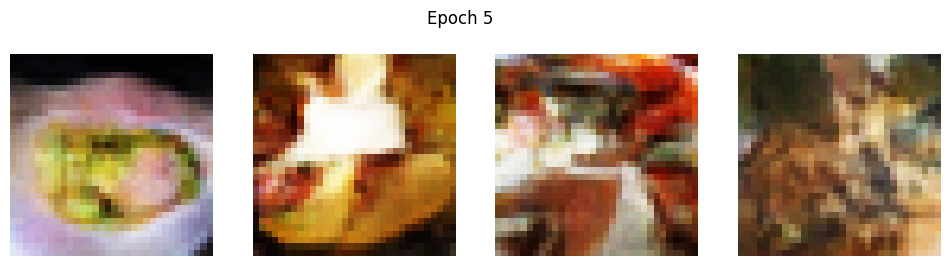

Training complete!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt

DATA_DIR = "food-101/food-101/images"
IMAGE_SIZE = 32
BATCH_SIZE = 16  
LATENT_DIM = 100
EPOCHS = 5             
NUM_WORKERS = 4              

transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(root=DATA_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True,
                       num_workers=NUM_WORKERS, pin_memory=True)

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            
            nn.ConvTranspose2d(LATENT_DIM, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh() 
        )

    def forward(self, x):
        return self.main(x)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x).view(-1)

device = "cpu"  
G = Generator().to(device)
D = Discriminator().to(device)

optim_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optim_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

for epoch in range(EPOCHS):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        
        real_labels = torch.ones(batch_size, device=device)
        fake_labels = torch.zeros(batch_size, device=device)
        
        D.zero_grad()
        noise = torch.randn(batch_size, LATENT_DIM, 1, 1, device=device)
        fake_images = G(noise)
        
        outputs_real = D(real_images)
        d_loss_real = criterion(outputs_real, real_labels)
        
        outputs_fake = D(fake_images.detach())
        d_loss_fake = criterion(outputs_fake, fake_labels)
        
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optim_D.step()
        
        G.zero_grad()
        outputs = D(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optim_G.step()
        
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}] Batch {i}/{len(dataloader)} "
                  f"Loss D: {d_loss.item():.4f} G: {g_loss.item():.4f}")
    
    with torch.no_grad():
        test_noise = torch.randn(4, LATENT_DIM, 1, 1, device=device)
        generated = G(test_noise)
        fig, axs = plt.subplots(1, 4, figsize=(12, 3))
        for j in range(4):
            axs[j].imshow(generated[j].permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
            axs[j].axis('off')
        plt.suptitle(f"Epoch {epoch+1}")
        plt.show()

print("Training complete!")

torch.save(G.state_dict(), "cpu_generator.pth")

In [ ]:
import cv2
import numpy as np
import torch
import os
import tempfile
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
from transformers import AutoTokenizer, AutoModelForCausalLM
from diffusers import StableDiffusionPipeline
import gradio as gr

LATENT_DIM = 100
device = "cpu"

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(LATENT_DIM, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

G = Generator().to(device)
G.load_state_dict(torch.load("cpu_generator.pth", map_location=device))
G.eval()

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def detect_ingredients(image_path):
    weights_path = "/content/drive/MyDrive/yolov3.weights"
    cfg_path = "/content/drive/MyDrive/yolov3.cfg"
    names_path = "/content/drive/MyDrive/coco.names"

    net = cv2.dnn.readNet(weights_path, cfg_path)
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    with open(names_path, "r") as f:
        classes = [line.strip() for line in f.readlines()]

    food_classes = [
        'apple', 'banana', 'orange', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'broccoli', 'sandwich', 'tomato', 'bowl',
        'potato', 'cucumber', 'lettuce', 'onion', 'pepper', 'strawberry'
    ]

    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    ingredients = set()
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5 and classes[class_id] in food_classes:
                ingredients.add(classes[class_id])
    return sorted(list(ingredients))

def generate_recipe(ingredients):
    prompt = f"""
You are a professional chef. Create a detailed recipe using the following ingredients: {', '.join(ingredients)}.

Include:
- Recipe Title
- Preparation Time
- Cooking Time
- Ingredients with quantities
- Step-by-step Instructions
- Serving Suggestion
- Nutritional Tip

Recipe:
"""
    model_name = "MBZUAI/LaMini-GPT-774M"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    with torch.no_grad():
        outputs = model.generate(
            input_ids=input_ids,
            max_new_tokens=500,
            temperature=0.7,
            top_k=50,
            top_p=0.9,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )
    result = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return result[len(prompt):].strip()

def generate_gan_image():
    noise = torch.randn(1, LATENT_DIM, 1, 1, device=device)
    with torch.no_grad():
        fake_image = G(noise)[0]
    img = (fake_image * 0.5 + 0.5).clamp(0, 1)
    return T.ToPILImage()(img.cpu()).resize((256, 256), Image.BICUBIC)

def generate_sd_image(prompt):
    with torch.no_grad():
        return pipe(prompt, guidance_scale=7.5).images[0]

def full_pipeline(image: Image.Image):
    with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as tmp:
        tmp_path = tmp.name
        image.save(tmp_path)

    ingredients = detect_ingredients(tmp_path)
    os.remove(tmp_path)

    if not ingredients:
        return "❌ No ingredients detected.", None, None

    recipe = generate_recipe(ingredients)
    title_line = recipe.splitlines()[0] if recipe else "Dish"

    gan_img = generate_gan_image()
    sd_img = generate_sd_image(title_line)

    full_output = f"✅ Detected Ingredients: {', '.join(ingredients)}\n\n" + \
                  f"🍽️ AI-GENERATED RECIPE\n" + "="*60 + f"\n{recipe}\n" + "="*60
    return full_output, gan_img, sd_img

iface = gr.Interface(
    fn=full_pipeline,
    inputs=gr.Image(type="pil", label="📸 Upload Food Image"),
    outputs=[
        gr.Textbox(label="📝 Generated Recipe", lines=25),
        gr.Image(label="🎨 Dish Image (GAN Generator)"),
        gr.Image(label="🧠 Dish Image (Stable Diffusion)")
    ],
    title="🍳 AI-Powered Food Recipe & Dish Image Generator"
)

iface.launch(share=True)